# Fashion MNIST
---
[Fashion MNIST 대회 링크](https://dacon.io/competitions/open/235594/overview/)

[ Files ]    
* train.csv : 의류의 라벨과 이미지 픽셀값   
* test_csv : 의류 이미지 픽셀값   

* 라벨 값   
0 : T-shirt/top   
1 : Trouser   
2 : Pullover   
3 : Dress   
4 : Coat   
5 : Sandal   
6 : Shirt   
7 : Sneaker   
8 : Bag   
9 : Ankle boot   

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [46]:
train = pd.read_csv('./kaggle-dataset/fashion-mnist_train.csv')
test = pd.read_csv('./kaggle-dataset/fashion-mnist_test.csv')

In [47]:
y_train = train['label']
x_train = train.drop('label', axis=1)
y_test = test['label']
x_test = test.drop('label', axis=1)

In [48]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


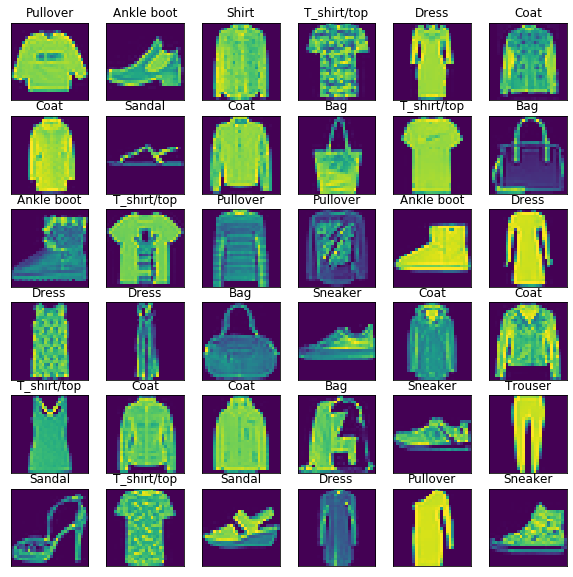

In [49]:
x_train = x_train.values.reshape(-1, 28, 28)

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [50]:
x_train = x_train / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)

x_test = x_test / 255.0
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [51]:
y_train = to_categorical(y_train, num_classes = 10)

In [76]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)              

In [77]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [ ]:
model.compile(optimizer='adam',
          loss = 'categorical_crossentropy',
          metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 260s 4ms/sample - loss: 0.3478 - accuracy: 0.8746
Epoch 2/5
18528/60000 [========>.....................] - ETA: 2:57 - loss: 0.2102 - accuracy: 0.9228

In [ ]:
print(model.evaluate(x_train, y_train, verbose=2))

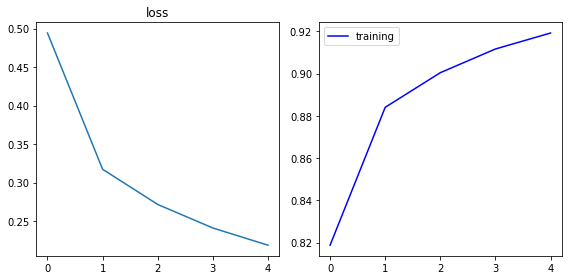

In [27]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2 ,1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.legend()
plt.tight_layout()
plt.show()

In [71]:
y_test = model.predict(x_test)
y_test = np.argmax(y_test, axis=1)
y_test = pd.Series(y_test, name="label")
submission = pd.concat([pd.Series(range(0, 10000), name="index"), y_test], axis=1)
submission.to_csv("dacon_submission.csv", index=False)